In [1]:
import Pkg; Pkg.add("DifferentialEquations")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [2]:
import Pkg; Pkg.add("SpecialFunctions")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [3]:
import Pkg; Pkg.add("QuadGK")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [4]:
import Pkg
Pkg.add("SphericalFunctions")


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [1]:
using SphericalFunctions


In [5]:
using DifferentialEquations, SpecialFunctions, LinearAlgebra, Plots,QuadGK,SphericalFunctions

In [9]:
# Parameters
l_max = 10
num_modes = (l_max + 1)^2

# Initial conditions
c0 = zeros(Float64, num_modes)
cdot0 = zeros(Float64, num_modes)

# Laplacian eigenvalues ( I learnt this from ChatGPT :) ) so it basically creates an array which the first element represents
# the eigen value of l=0, m=0 and the second one is l=1 and m=-1 and so on
function compute_laplacian_eigenvalues(lmax)
    index = 1
    eigenvalues = zeros(Float64, (lmax + 1)^2)
    for l in 0:lmax
        for m in -l:l
            eigenvalues[index] = -l * (l + 1)
            index += 1
        end
    end
    return eigenvalues
end

Laplacian_eigen_value = compute_laplacian_eigenvalues(l_max)

# Wave Equation System
# the vector u here is [c_1, c_2, ..,c_n, c_dot_1, ...c_dot_n] 
# which c_1 is the coeffiecent of Y_Lm for m=0 and l =0 and the similarly for the rest
function wave_equation!(du, u, p, t)
    # lentgh of u is 2n_max
    n_max = length(u) ÷ 2
    c = u[1:n_max]
    cdot = u[n_max+1:end]
    # first part of du is just c_dot, the second part of the eigen values
    du[1:n_max] .= cdot                          
    du[n_max+1:end] .= Laplacian_eigen_value .* c 

    # Debugging print statements
    #if t < 0.01  # To avoid flooding the output
        #println("At time t=$t, c[4] = ", c[4], ", cdot[4] = ", cdot[4])
    #end
end


wave_equation! (generic function with 1 method)

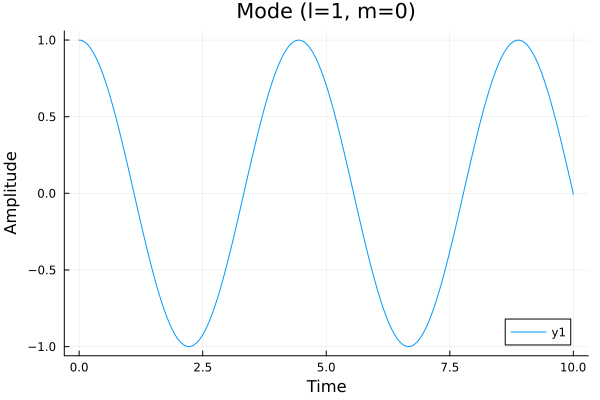

In [19]:
# Example to check: excite the (l=1, m=0) mode
c0[2] = 1.0  
u0 = vcat(c0, cdot0)                  
tspan = (0.0, 10.0)                    
prob = ODEProblem(wave_equation!, u0, tspan)
sol = solve(prob, Tsit5(), reltol=1e-6, abstol=1e-6)
plot(sol.t, sol[2, :], xlabel="Time", ylabel="Amplitude", title="Mode (l=1, m=0)")


In [14]:
# Width of Gaussian
σ = 0.2  
#I'm starting from near the pole( I couldn't exaclty hae the peak on the pole I was only getting zeros)
# Gaussian Peak
    function gaussian_peak(θ)
        return exp(-((θ - 0.001)^2) / (2 * σ^2))
    end   

gaussian_peak (generic function with 1 method)

In [20]:
#here we only compute the coeffiencet for each y_lm by taking the integral
function compute_initial_coeffs(l_max)
    c0 = zeros(Float64, num_modes)
    index = 1

    for l in 0:l_max
        for m in -l:l
            
            if m == 0 
                Ylm = θ -> real(sYlm_values(θ, 0.0, l, m)[1])
                #real(sYlm_values(0.0, l, m, θ)[1]) ### here! how to use Ylm?

                integrand(θ) = gaussian_peak(θ) * Ylm(θ) * sin(θ)
                c_l, _ = quadgk(integrand, 0, π)
                c0[index] = c_l
            end
            index += 1
        end
    end
    return c0
end


compute_initial_coeffs (generic function with 1 method)

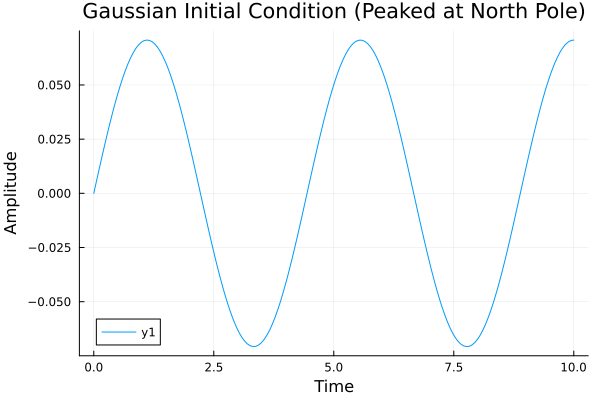

In [22]:
#checking for an example 
l_max = 10
num_modes = (l_max + 1)^2

c0 = compute_initial_coeffs(l_max )
cdot0 = zeros(Float64, num_modes)
cdot0[4] = 0.1

 
# ODE Solver Setup
u0 = vcat(c0, cdot0)
tspan = (0.0, 10.0)
prob = ODEProblem(wave_equation!, u0, tspan)
sol = solve(prob, Tsit5(), reltol=1e-6, abstol=1e-6)

# Plotting the evolution of the dominant mode (e.g., l = 2, m = 0)
plot(sol.t, sol[4, :], xlabel="Time", ylabel="Amplitude", 
     title="Gaussian Initial Condition (Peaked at North Pole)")

In [32]:
 # creating a mash grid on the sphere
θ = range(0, π, length=100)
φ = range(0, 2π, length=100)
# appearntly this is how you can make a grid on Julia
# Θ is the horizontal element and Φ is the veritical one
Θ = repeat(θ', length(φ), 1)
Φ = repeat(φ, 1, length(θ))


100×100 Matrix{Float64}:
 0.0        0.0        0.0        …  0.0        0.0        0.0
 0.0634665  0.0634665  0.0634665     0.0634665  0.0634665  0.0634665
 0.126933   0.126933   0.126933      0.126933   0.126933   0.126933
 0.1904     0.1904     0.1904        0.1904     0.1904     0.1904
 0.253866   0.253866   0.253866      0.253866   0.253866   0.253866
 0.317333   0.317333   0.317333   …  0.317333   0.317333   0.317333
 0.380799   0.380799   0.380799      0.380799   0.380799   0.380799
 0.444266   0.444266   0.444266      0.444266   0.444266   0.444266
 0.507732   0.507732   0.507732      0.507732   0.507732   0.507732
 0.571199   0.571199   0.571199      0.571199   0.571199   0.571199
 0.634665   0.634665   0.634665   …  0.634665   0.634665   0.634665
 0.698132   0.698132   0.698132      0.698132   0.698132   0.698132
 0.761598   0.761598   0.761598      0.761598   0.761598   0.761598
 ⋮                                ⋱                        
 5.58505    5.58505    5.58505       

In [33]:
# ϕ = Σ c_lm Ylm
function reconstruct_field(sol, t_idx)
    ϕ = zeros(size(Θ))
    index = 1
    for l in 0:l_max
        for m in -l:l
            
            Ylm_vals = [real(sYlm_values(Θ[i, j], Φ[i, j], l, m)[1]) for i in 1:size(Θ, 1), j in 1:size(Θ, 2)]
            c_lm = sol[index, t_idx]
            ϕ .+= c_lm .* Ylm_vals  
            index += 1
        end
    end
    return ϕ
end


reconstruct_field (generic function with 1 method)

[ Info: Saved animation to /Users/kianasalehi/Desktop/NumericalMethods/wave_evolution_l_10.gif


Plots.AnimatedGif("/Users/kianasalehi/Desktop/NumericalMethods/wave_evolution_l_10.gif")
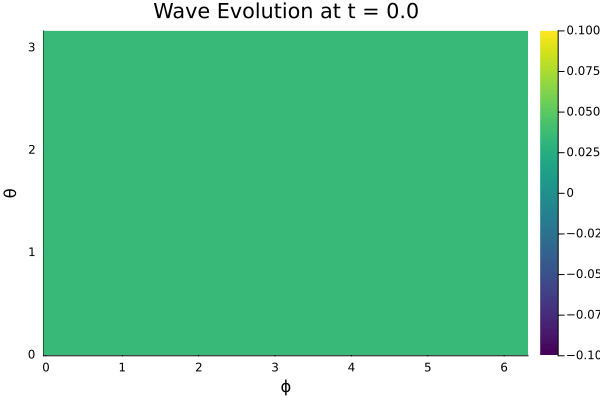

In [34]:
# Animate from t = 0 to t = 10 ( I learnt this from ChatGPT :) ) 
anim = @animate for t_idx in 1:10:length(sol.t)
    ϕ_field = reconstruct_field(sol, t_idx)
    
    # Use θ and φ directly instead of Θ and Φ
    heatmap(φ, θ, ϕ_field, c=:viridis, 
            title="Wave Evolution at t = $(round(sol.t[t_idx], digits=2))",
            xlabel="ϕ", ylabel="θ", clims=(-0.1, 0.1))
end

# Save the animation as a GIF
gif(anim, "wave_evolution_l_10.gif", fps=10)


[ Info: Saved animation to /Users/kianasalehi/Desktop/NumericalMethods/wave_evolution_l_4.gif


Plots.AnimatedGif("/Users/kianasalehi/Desktop/NumericalMethods/wave_evolution_l_4.gif")
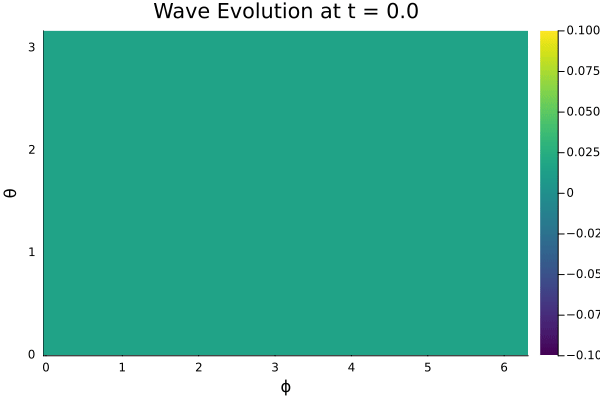

In [35]:
l_max = 4
anim = @animate for t_idx in 1:10:length(sol.t)
    ϕ_field = reconstruct_field(sol, t_idx)
    
    # Use θ and φ directly instead of Θ and Φ
    heatmap(φ, θ, ϕ_field, c=:viridis, 
            title="Wave Evolution at t = $(round(sol.t[t_idx], digits=2))",
            xlabel="ϕ", ylabel="θ", clims=(-0.1, 0.1))
end

# Save the animation as a GIF
gif(anim, "wave_evolution_l_4.gif", fps=10)


[ Info: Saved animation to /Users/kianasalehi/Desktop/NumericalMethods/wave_evolution_l_12.gif


Plots.AnimatedGif("/Users/kianasalehi/Desktop/NumericalMethods/wave_evolution_l_12.gif")
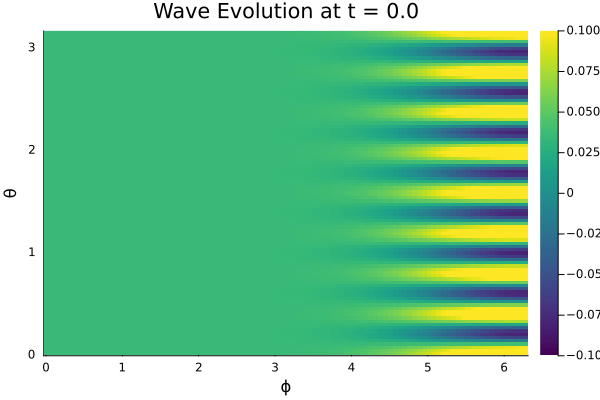

In [36]:
l_max = 12
anim = @animate for t_idx in 1:10:length(sol.t)
    ϕ_field = reconstruct_field(sol, t_idx)
    
    # Use θ and φ directly instead of Θ and Φ
    heatmap(φ, θ, ϕ_field, c=:viridis, 
            title="Wave Evolution at t = $(round(sol.t[t_idx], digits=2))",
            xlabel="ϕ", ylabel="θ", clims=(-0.1, 0.1))
end

# Save the animation as a GIF
gif(anim, "wave_evolution_l_12.gif", fps=10)
